## Sequential Forward Selection (SFS)

### 1.Unbalanced Data

#### Import dataset

In [1]:
import pandas as pd
df = pd.read_csv("Finaltest.csv")

In [2]:
df.head()

,enrollment_id,username,course_id,source_browser,source_server,event_access,event_discussion,event_navigate,event_page_close,event_problem,event_video,event_wiki,Target
0,1,9Uee7oEuuMmgPx2IzPfFkWgkHZyPbWr0,0,195,119,107,0,25,66,87,29,0,0
1,3,1qXC7Fjbwp66GPQc6pHLfEuO8WKozxG4,0,200,88,79,26,14,22,138,9,0,0
2,4,FIHlppZyoq8muPbdVxS44gfvceX9zvU7,0,19,80,64,0,15,10,6,4,0,0
3,5,p1Mp7WkVfzUijX0peVQKSHbgd5pXyl4c,0,431,202,226,34,30,87,170,86,0,0
4,6,dpK33RH9yepUAnyoywRwBt1AJzxGlaja,0,6,17,12,0,5,2,2,2,0,0


In [3]:
df.shape

(120542, 13)

In [4]:
#Check missing value
df.isnull().sum()

enrollment_id       0
username            0
course_id           0
source_browser      0
source_server       0
event_access        0
event_discussion    0
event_navigate      0
event_page_close    0
event_problem       0
event_video         0
event_wiki          0
Target              0
dtype: int64

In [5]:
#check if any missing value
df[df.isnull().any(axis=1)]

,enrollment_id,username,course_id,source_browser,source_server,event_access,event_discussion,event_navigate,event_page_close,event_problem,event_video,event_wiki,Target


#### Drop columns

In [6]:
#df=df.drop(columns='id_student')
df=df.drop(columns='username')
df=df.drop(columns='enrollment_id')

In [7]:
df.shape

(120542, 11)

### Target Feature and Dependent Feature

In [8]:
X = df.iloc[:,0:10] # all columns/features except target 
y = df.iloc[:,-1]  #target

In [9]:
X

,course_id,source_browser,source_server,event_access,event_discussion,event_navigate,event_page_close,event_problem,event_video,event_wiki
0,0,195,119,107,0,25,66,87,29,0
1,0,200,88,79,26,14,22,138,9,0
2,0,19,80,64,0,15,10,6,4,0
3,0,431,202,226,34,30,87,170,86,0
4,0,6,17,12,0,5,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
120537,0,0,1,0,0,1,0,0,0,0
120538,0,0,1,0,0,1,0,0,0,0
120539,0,3,5,3,0,2,2,0,1,0
120540,0,0,1,0,0,1,0,0,0,0


In [10]:
y

0         0
1         0
2         0
3         0
4         0
         ..
120537    1
120538    1
120539    1
120540    1
120541    1
Name: Target, Length: 120542, dtype: int64

### Split and Train Data

In [11]:
from sklearn.model_selection import StratifiedKFold, train_test_split

#training 0.3,
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y, random_state=42)

### Feature Selection Models

In [12]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [14]:
X_train.shape

(84379, 10)

### Algorithms

In [15]:
ffs_lr=SequentialFeatureSelector(LogisticRegression(),k_features="best",forward=True,floating=False, verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)  
ffs_lr.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished

[2022-11-20 22:06:12] Features: 1/10 -- score: 0.9116611275435409[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    0.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.2s finished

[2022-11-20 22:06:14] Features: 2/10 -- score: 0.9131009409740007[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.5s finished

[2022-11-20 22:06:14] Features: 3/10 -- score: 0.9133896536828331[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of

{1: {'feature_idx': (2,),
  'cv_scores': array([0.91026319, 0.91218449, 0.91336363, 0.91150474, 0.91098959]),
  'avg_score': 0.9116611275435409,
  'feature_names': ('source_server',)},
 2: {'feature_idx': (2, 4),
  'cv_scores': array([0.91133074, 0.91258297, 0.91588917, 0.91380895, 0.91189287]),
  'avg_score': 0.9131009409740007,
  'feature_names': ('source_server', 'event_discussion')},
 3: {'feature_idx': (2, 4, 6),
  'cv_scores': array([0.91192771, 0.91319236, 0.91568225, 0.91345372, 0.91269223]),
  'avg_score': 0.9133896536828331,
  'feature_names': ('source_server', 'event_discussion', 'event_page_close')},
 4: {'feature_idx': (2, 4, 6, 9),
  'cv_scores': array([0.91211469, 0.91313559, 0.91612721, 0.9138778 , 0.91308507]),
  'avg_score': 0.9136680707216606,
  'feature_names': ('source_server',
   'event_discussion',
   'event_page_close',
   'event_wiki')},
 5: {'feature_idx': (2, 3, 4, 6, 9),
  'cv_scores': array([0.91207743, 0.91335358, 0.91695832, 0.91360729, 0.91302653]),
  'a

In [16]:
ffs_naivebayes=SequentialFeatureSelector(GaussianNB(),k_features="best",forward=True,floating=False, verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)  
ffs_naivebayes.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-11-20 22:06:24] Features: 1/10 -- score: 0.9108860584578207[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2022-11-20 22:06:24] Features: 2/10 -- score: 0.9127156189969273[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2022-11-20 22:06:24] Features: 3/10 -- score: 0.9129905930641341[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of

{1: {'feature_idx': (2,),
  'cv_scores': array([0.90932597, 0.91143216, 0.91234084, 0.91049523, 0.91083609]),
  'avg_score': 0.9108860584578207,
  'feature_names': ('source_server',)},
 2: {'feature_idx': (2, 6),
  'cv_scores': array([0.91183163, 0.91155254, 0.91433044, 0.91256539, 0.9132981 ]),
  'avg_score': 0.9127156189969273,
  'feature_names': ('source_server', 'event_page_close')},
 3: {'feature_idx': (2, 3, 6),
  'cv_scores': array([0.91117764, 0.91237077, 0.91541756, 0.91309626, 0.91289074]),
  'avg_score': 0.9129905930641341,
  'feature_names': ('source_server', 'event_access', 'event_page_close')},
 4: {'feature_idx': (0, 2, 3, 6),
  'cv_scores': array([0.91117764, 0.91237077, 0.91541756, 0.91309626, 0.91289074]),
  'avg_score': 0.9129905930641341,
  'feature_names': ('course_id',
   'source_server',
   'event_access',
   'event_page_close')},
 5: {'feature_idx': (0, 2, 3, 5, 6),
  'cv_scores': array([0.91179528, 0.91131893, 0.91558651, 0.91380795, 0.91204954]),
  'avg_score'

In [17]:
ffs_dtree=SequentialFeatureSelector(DecisionTreeClassifier(),k_features= "best",forward=True,floating=False,verbose=2,scoring= "f1", cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_dtree.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2022-11-20 22:06:28] Features: 1/10 -- score: 0.911398671508663[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.3s finished

[2022-11-20 22:06:28] Features: 2/10 -- score: 0.911398671508663[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.3s finished

[2022-11-20 22:06:29] Features: 3/10 -- score: 0.9080148482265928[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  

{1: {'feature_idx': (2,),
  'cv_scores': array([0.91015387, 0.91045796, 0.91542611, 0.91063002, 0.9103254 ]),
  'avg_score': 0.911398671508663,
  'feature_names': ('source_server',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.91015387, 0.91045796, 0.91542611, 0.91063002, 0.9103254 ]),
  'avg_score': 0.911398671508663,
  'feature_names': ('course_id', 'source_server')},
 3: {'feature_idx': (0, 2, 9),
  'cv_scores': array([0.90793925, 0.90731497, 0.91060246, 0.90700847, 0.90720909]),
  'avg_score': 0.9080148482265928,
  'feature_names': ('course_id', 'source_server', 'event_wiki')},
 4: {'feature_idx': (0, 2, 4, 9),
  'cv_scores': array([0.90073701, 0.8957476 , 0.90041733, 0.90122878, 0.89770385]),
  'avg_score': 0.8991669147316987,
  'feature_names': ('course_id',
   'source_server',
   'event_discussion',
   'event_wiki')},
 5: {'feature_idx': (0, 2, 4, 7, 9),
  'cv_scores': array([0.89230769, 0.89304619, 0.89491082, 0.89398677, 0.89267387]),
  'avg_score': 0.8933850684768988

In [18]:
ffs_mlp= SequentialFeatureSelector(MLPClassifier(max_iter=2000),k_features="best",forward=True,floating=False,verbose=2,scoring= "f1", cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_mlp.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   17.1s remaining:   40.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   28.0s finished

[2022-11-20 22:07:06] Features: 1/10 -- score: 0.9107204266091141[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   27.7s remaining:   55.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   38.3s finished

[2022-11-20 22:07:44] Features: 2/10 -- score: 0.9127883811995515[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   33.9s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.0min finished

[2022-11-20 22:08:46] Features: 3/10 -- score: 0.9141628696976181[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of

{1: {'feature_idx': (2,),
  'cv_scores': array([0.90492342, 0.91058085, 0.91607641, 0.91047486, 0.91154659]),
  'avg_score': 0.9107204266091141,
  'feature_names': ('source_server',)},
 2: {'feature_idx': (2, 7),
  'cv_scores': array([0.91123923, 0.91101264, 0.91579855, 0.91262345, 0.91326803]),
  'avg_score': 0.9127883811995515,
  'feature_names': ('source_server', 'event_problem')},
 3: {'feature_idx': (2, 7, 9),
  'cv_scores': array([0.9124627 , 0.91276182, 0.91813138, 0.91410247, 0.91335598]),
  'avg_score': 0.9141628696976181,
  'feature_names': ('source_server', 'event_problem', 'event_wiki')},
 4: {'feature_idx': (2, 4, 7, 9),
  'cv_scores': array([0.91214187, 0.91302155, 0.91706718, 0.91546333, 0.91156116]),
  'avg_score': 0.9138510166254685,
  'feature_names': ('source_server',
   'event_discussion',
   'event_problem',
   'event_wiki')},
 5: {'feature_idx': (2, 4, 6, 7, 9),
  'cv_scores': array([0.9127531 , 0.91370595, 0.91786987, 0.91569695, 0.91346877]),
  'avg_score': 0.91

In [19]:
ffs_randomforest = SequentialFeatureSelector(RandomForestClassifier(),k_features="best",forward=True,floating=False,verbose=2,scoring= "f1", cv= 5, n_jobs=-1).fit(X_train, y_train)   
ffs_randomforest.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   11.1s remaining:   25.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.8s finished

[2022-11-20 22:50:05] Features: 1/10 -- score: 0.9114320816050856[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   16.9s remaining:   33.9s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   20.2s finished

[2022-11-20 22:50:25] Features: 2/10 -- score: 0.9112475374341716[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   14.4s remaining:   43.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   17.5s finished

[2022-11-20 22:50:43] Features: 3/10 -- score: 0.9085750241841121[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of

{1: {'feature_idx': (2,),
  'cv_scores': array([0.91015387, 0.91035971, 0.91542611, 0.9106481 , 0.91057262]),
  'avg_score': 0.9114320816050856,
  'feature_names': ('source_server',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.91015387, 0.91035971, 0.91511506, 0.91019952, 0.91040953]),
  'avg_score': 0.9112475374341716,
  'feature_names': ('course_id', 'source_server')},
 3: {'feature_idx': (0, 2, 9),
  'cv_scores': array([0.90859521, 0.90792445, 0.91105044, 0.90729614, 0.90800889]),
  'avg_score': 0.9085750241841121,
  'feature_names': ('course_id', 'source_server', 'event_wiki')},
 4: {'feature_idx': (0, 2, 4, 9),
  'cv_scores': array([0.90597063, 0.90401786, 0.90756182, 0.90523664, 0.90362403]),
  'avg_score': 0.9052821939388899,
  'feature_names': ('course_id',
   'source_server',
   'event_discussion',
   'event_wiki')},
 5: {'feature_idx': (0, 2, 4, 7, 9),
  'cv_scores': array([0.90595385, 0.9058296 , 0.90966364, 0.90772128, 0.9052303 ]),
  'avg_score': 0.90687973191555

In [20]:
ffs_knn= SequentialFeatureSelector(KNeighborsClassifier(),k_features="best",forward=True, floating=False,verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_knn.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    7.8s remaining:   18.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.6s finished

[2022-11-20 23:04:19] Features: 1/10 -- score: 0.8980965094336166[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    4.5s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    5.1s finished

[2022-11-20 23:04:24] Features: 2/10 -- score: 0.9026414517481379[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    4.3s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    4.4s finished

[2022-11-20 23:04:29] Features: 3/10 -- score: 0.9044153346428832[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of

{1: {'feature_idx': (2,),
  'cv_scores': array([0.87426407, 0.90184159, 0.90704427, 0.90342364, 0.90390897]),
  'avg_score': 0.8980965094336166,
  'feature_names': ('source_server',)},
 2: {'feature_idx': (2, 6),
  'cv_scores': array([0.90322115, 0.90203595, 0.90545862, 0.90236494, 0.90012661]),
  'avg_score': 0.9026414517481379,
  'feature_names': ('source_server', 'event_page_close')},
 3: {'feature_idx': (2, 6, 7),
  'cv_scores': array([0.90413432, 0.90351922, 0.90363886, 0.90680537, 0.90397889]),
  'avg_score': 0.9044153346428832,
  'feature_names': ('source_server', 'event_page_close', 'event_problem')},
 4: {'feature_idx': (2, 5, 6, 7),
  'cv_scores': array([0.90544495, 0.90284103, 0.90657114, 0.90721501, 0.90444662]),
  'avg_score': 0.9053037496414286,
  'feature_names': ('source_server',
   'event_navigate',
   'event_page_close',
   'event_problem')},
 5: {'feature_idx': (2, 5, 6, 7, 8),
  'cv_scores': array([0.90130624, 0.90500489, 0.90772796, 0.90793467, 0.90492919]),
  'avg

In [56]:
ffs_svc= SequentialFeatureSelector(SVC(),k_features="best",forward=True, floating=False,verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_svc.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed: 19.8min remaining: 46.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 34.1min finished

[2022-11-21 01:28:23] Features: 1/10 -- score: 0.9120781544680258[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed: 50.5min remaining: 101.0min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 60.9min finished

[2022-11-21 02:29:18] Features: 2/10 -- score: 0.9137400680758997[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed: 39.3min remaining: 117.9min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 51.5min finished

[2022-11-21 03:20:46] Features: 3/10 -- score: 0.9145384122884774[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out 

{1: {'feature_idx': (2,),
  'cv_scores': array([0.91017281, 0.91172379, 0.91530376, 0.91165977, 0.91153064]),
  'avg_score': 0.9120781544680258,
  'feature_names': ('source_server',)},
 2: {'feature_idx': (2, 7),
  'cv_scores': array([0.91237315, 0.91323582, 0.91650928, 0.91409817, 0.91248391]),
  'avg_score': 0.9137400680758997,
  'feature_names': ('source_server', 'event_problem')},
 3: {'feature_idx': (2, 4, 7),
  'cv_scores': array([0.91287636, 0.91396202, 0.91728681, 0.91507651, 0.91349036]),
  'avg_score': 0.9145384122884774,
  'feature_names': ('source_server', 'event_discussion', 'event_problem')},
 4: {'feature_idx': (2, 4, 7, 9),
  'cv_scores': array([0.91317344, 0.9143549 , 0.91746778, 0.9154573 , 0.91353357]),
  'avg_score': 0.9147973972389021,
  'feature_names': ('source_server',
   'event_discussion',
   'event_problem',
   'event_wiki')},
 5: {'feature_idx': (2, 4, 7, 8, 9),
  'cv_scores': array([0.91288256, 0.91418801, 0.91789504, 0.91536184, 0.91394743]),
  'avg_score'

### Significant Features

In [21]:
ffs_lr.k_feature_idx_ 

(2, 3, 4, 5, 6, 9)

In [22]:
ffs_naivebayes.k_feature_idx_ 

(2, 3, 6)

In [23]:
ffs_dtree.k_feature_idx_ 

(2,)

In [24]:
ffs_mlp.k_feature_idx_ 

(0, 2, 4, 5, 6, 7, 9)

In [25]:
ffs_randomforest.k_feature_idx_ 

(2,)

In [57]:
ffs_svc.k_feature_idx_ 

(0, 1, 2, 3, 4, 5, 7, 8, 9)

In [27]:
ffs_knn.k_feature_idx_ 

(1, 2, 5, 6, 7, 8, 9)

### Name of Significant Features

In [28]:
ffs_lr.k_feature_names_ #name of the features choosen

('source_server',
 'event_access',
 'event_discussion',
 'event_navigate',
 'event_page_close',
 'event_wiki')

In [29]:
ffs_naivebayes.k_feature_names_ #name of the features choosen

('source_server', 'event_access', 'event_page_close')

In [30]:
ffs_dtree.k_feature_names_ #name of the features choosen

('source_server',)

In [31]:
ffs_mlp.k_feature_names_ #name of the features choosen

('course_id',
 'source_server',
 'event_discussion',
 'event_navigate',
 'event_page_close',
 'event_problem',
 'event_wiki')

In [32]:
ffs_randomforest.k_feature_names_ #name of the features choosen

('source_server',)

In [58]:
ffs_svc.k_feature_names_ #name of the features choosen

('course_id',
 'source_browser',
 'source_server',
 'event_access',
 'event_discussion',
 'event_navigate',
 'event_problem',
 'event_video',
 'event_wiki')

In [34]:
ffs_knn.k_feature_names_ #name of the features choosen

('source_browser',
 'source_server',
 'event_navigate',
 'event_page_close',
 'event_problem',
 'event_video',
 'event_wiki')

#### Highest Fscore based on Algorithms

In [35]:
ffs_lr.k_score_

0.9138287616527403

In [36]:
ffs_naivebayes.k_score_

0.9129905930641341

In [37]:
ffs_dtree.k_score_

0.911398671508663

In [38]:
ffs_mlp.k_score_

0.9154013689087999

In [39]:
ffs_randomforest.k_score_

0.9114320816050856

In [59]:
ffs_svc.k_score_

0.9150405772145392

In [41]:
ffs_knn.k_score_

0.9061857494376607

### Tabulated Result and Graph

In [42]:
download=pd.DataFrame.from_dict(ffs_naivebayes.get_metric_dict()).T
download.to_csv("forward.gaussian.csv")
pd.DataFrame.from_dict(ffs_naivebayes.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.9093259722561935, 0.9114321608040201, 0.912...",0.910886,"(source_server,)",0.001286,0.001,0.0005
2,"(2, 6)","[0.9118316268486917, 0.9115525390000355, 0.914...",0.912716,"(source_server, event_page_close)",0.001299,0.00101,0.000505
3,"(2, 3, 6)","[0.9111776447105788, 0.9123707664884135, 0.915...",0.912991,"(source_server, event_access, event_page_close)",0.001779,0.001384,0.000692
4,"(0, 2, 3, 6)","[0.9111776447105788, 0.9123707664884135, 0.915...",0.912991,"(course_id, source_server, event_access, event...",0.001779,0.001384,0.000692
5,"(0, 2, 3, 5, 6)","[0.9117952761549765, 0.91131892937762, 0.91558...",0.912912,"(course_id, source_server, event_access, event...",0.002031,0.00158,0.00079
6,"(0, 2, 3, 4, 5, 6)","[0.9115142012045188, 0.9104435110699792, 0.915...",0.91215,"(course_id, source_server, event_access, event...",0.00217,0.001688,0.000844
7,"(0, 1, 2, 3, 4, 5, 6)","[0.9107060040669259, 0.9099925082943884, 0.914...",0.911581,"(course_id, source_browser, source_server, eve...",0.002054,0.001598,0.000799
8,"(0, 1, 2, 3, 4, 5, 6, 8)","[0.9097795405009468, 0.9098316714913691, 0.913...",0.910921,"(course_id, source_browser, source_server, eve...",0.00158,0.001229,0.000615
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.9092988349653348, 0.9093378122431476, 0.912...",0.910354,"(course_id, source_browser, source_server, eve...",0.001406,0.001094,0.000547
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9080783921750617, 0.9083449284669449, 0.910...",0.909407,"(course_id, source_browser, source_server, eve...",0.00146,0.001136,0.000568


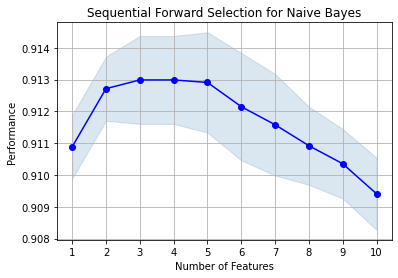

In [43]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(ffs_naivebayes.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection for Naive Bayes')
plt.grid()
plt.show()

In [44]:
download=pd.DataFrame.from_dict(ffs_dtree.get_metric_dict()).T
download.to_csv("forward.desiciontree.csv")
pd.DataFrame.from_dict(ffs_dtree.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.9101538682256735, 0.9104579630895421, 0.915...",0.911399,"(source_server,)",0.002596,0.00202,0.00101
2,"(0, 2)","[0.9101538682256735, 0.9104579630895421, 0.915...",0.911399,"(course_id, source_server)",0.002596,0.00202,0.00101
3,"(0, 2, 9)","[0.9079392499820054, 0.9073149710920386, 0.910...",0.908015,"(course_id, source_server, event_wiki)",0.00171,0.001331,0.000665
4,"(0, 2, 4, 9)","[0.9007370124033794, 0.8957475994513033, 0.900...",0.899167,"(course_id, source_server, event_discussion, e...",0.002703,0.002103,0.001051
5,"(0, 2, 4, 7, 9)","[0.8923076923076922, 0.8930461895439055, 0.894...",0.893385,"(course_id, source_server, event_discussion, e...",0.001215,0.000946,0.000473
6,"(0, 2, 4, 7, 8, 9)","[0.8885309514221913, 0.8878330470377545, 0.886...",0.887645,"(course_id, source_server, event_discussion, e...",0.001529,0.00119,0.000595
7,"(0, 2, 4, 6, 7, 8, 9)","[0.8842990447386863, 0.8783330260003687, 0.881...",0.881568,"(course_id, source_server, event_discussion, e...",0.003839,0.002987,0.001493
8,"(0, 1, 2, 4, 6, 7, 8, 9)","[0.8795931153945381, 0.8820324005891017, 0.878...",0.88021,"(course_id, source_browser, source_server, eve...",0.001451,0.001129,0.000564
9,"(0, 1, 2, 4, 5, 6, 7, 8, 9)","[0.8750927712631735, 0.8782666469806584, 0.876...",0.877557,"(course_id, source_browser, source_server, eve...",0.002914,0.002267,0.001134
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.8785288785288785, 0.8780036284201563, 0.876...",0.877655,"(course_id, source_browser, source_server, eve...",0.001657,0.001289,0.000645


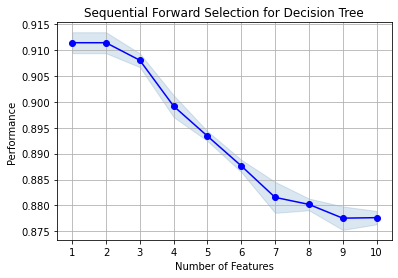

In [45]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig2 = plot_sfs(ffs_dtree.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection for Decision Tree')
plt.grid()
plt.show()

In [46]:
download=pd.DataFrame.from_dict(ffs_mlp.get_metric_dict()).T
download.to_csv("forward.mlp.csv")
pd.DataFrame.from_dict(ffs_mlp.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.9049234248124164, 0.9105808454568427, 0.916...",0.91072,"(source_server,)",0.004564,0.003551,0.001776
2,"(2, 7)","[0.9112392341091893, 0.9110126398372803, 0.915...",0.912788,"(source_server, event_problem)",0.002217,0.001725,0.000862
3,"(2, 7, 9)","[0.9124626971720904, 0.9127618225005398, 0.918...",0.914163,"(source_server, event_problem, event_wiki)",0.00265,0.002062,0.001031
4,"(2, 4, 7, 9)","[0.9121418730349383, 0.9130215464437559, 0.917...",0.913851,"(source_server, event_discussion, event_proble...",0.002684,0.002088,0.001044
5,"(2, 4, 6, 7, 9)","[0.9127531008162832, 0.9137059503177355, 0.917...",0.914699,"(source_server, event_discussion, event_page_c...",0.002393,0.001862,0.000931
6,"(0, 2, 4, 6, 7, 9)","[0.913710655913211, 0.9145093533445836, 0.9174...",0.914725,"(course_id, source_server, event_discussion, e...",0.001827,0.001421,0.000711
7,"(0, 2, 4, 5, 6, 7, 9)","[0.9138046426432773, 0.9144669603524229, 0.918...",0.915401,"(course_id, source_server, event_discussion, e...",0.002179,0.001696,0.000848
8,"(0, 2, 4, 5, 6, 7, 8, 9)","[0.9132331206517429, 0.912152803091055, 0.9183...",0.914672,"(course_id, source_server, event_discussion, e...",0.002687,0.002091,0.001045
9,"(0, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9131277533039648, 0.9118365858106876, 0.918...",0.914752,"(course_id, source_server, event_access, event...",0.002836,0.002206,0.001103
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9032917603762012, 0.914661775811846, 0.9182...",0.912649,"(course_id, source_browser, source_server, eve...",0.006463,0.005028,0.002514


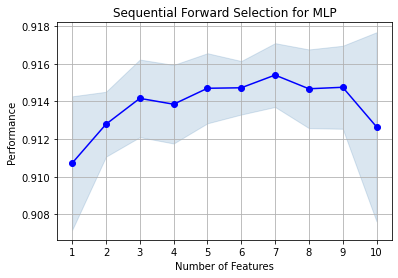

In [47]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig3 = plot_sfs(ffs_mlp.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection for MLP')
plt.grid()
plt.show()

In [48]:
download=pd.DataFrame.from_dict(ffs_randomforest.get_metric_dict()).T
download.to_csv("forward.randomforest.csv")
pd.DataFrame.from_dict(ffs_randomforest.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.9101538682256735, 0.9103597122302158, 0.915...",0.911432,"(source_server,)",0.002576,0.002004,0.001002
2,"(0, 2)","[0.9101538682256735, 0.9103597122302158, 0.915...",0.911248,"(course_id, source_server)",0.002488,0.001936,0.000968
3,"(0, 2, 9)","[0.9085952073468215, 0.9079244471524317, 0.911...",0.908575,"(course_id, source_server, event_wiki)",0.001677,0.001304,0.000652
4,"(0, 2, 4, 9)","[0.9059706315298174, 0.9040178571428571, 0.907...",0.905282,"(course_id, source_server, event_discussion, e...",0.00182,0.001416,0.000708
5,"(0, 2, 4, 7, 9)","[0.905953845040874, 0.905829596412556, 0.90966...",0.90688,"(course_id, source_server, event_discussion, e...",0.002084,0.001621,0.000811
6,"(0, 2, 4, 7, 8, 9)","[0.9074899445591912, 0.9062964439772357, 0.909...",0.907563,"(course_id, source_server, event_discussion, e...",0.001387,0.001079,0.00054
7,"(0, 2, 4, 6, 7, 8, 9)","[0.9078024441391279, 0.9067303171675527, 0.911...",0.908412,"(course_id, source_server, event_discussion, e...",0.002315,0.001801,0.000901
8,"(0, 2, 4, 5, 6, 7, 8, 9)","[0.9092090538247717, 0.9097018970189702, 0.913...",0.910597,"(course_id, source_server, event_discussion, e...",0.002168,0.001686,0.000843
9,"(0, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9089334055224688, 0.9105151066671479, 0.913...",0.910736,"(course_id, source_server, event_access, event...",0.002044,0.00159,0.000795
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.909353140549506, 0.9089531233084336, 0.9139...",0.910785,"(course_id, source_browser, source_server, eve...",0.002325,0.001809,0.000905


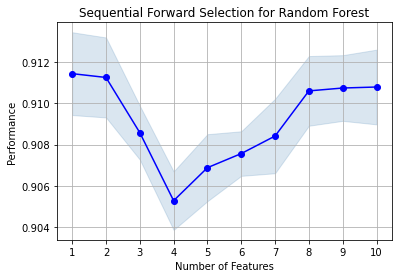

In [49]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig4 = plot_sfs(ffs_randomforest.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection for Random Forest')
plt.grid()
plt.show()

In [60]:
download=pd.DataFrame.from_dict(ffs_svc.get_metric_dict()).T
download.to_csv("forward.SVM.csv")
pd.DataFrame.from_dict(ffs_svc.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.9101728131124176, 0.9117237935585121, 0.915...",0.912078,"(source_server,)",0.002199,0.001711,0.000855
2,"(2, 7)","[0.9123731529286095, 0.9132358187656083, 0.916...",0.91374,"(source_server, event_problem)",0.001949,0.001516,0.000758
3,"(2, 4, 7)","[0.9128763613068547, 0.913962022159678, 0.9172...",0.914538,"(source_server, event_discussion, event_problem)",0.001994,0.001552,0.000776
4,"(2, 4, 7, 9)","[0.913173439612839, 0.9143549018909582, 0.9174...",0.914797,"(source_server, event_discussion, event_proble...",0.001991,0.001549,0.000774
5,"(2, 4, 7, 8, 9)","[0.91288256227758, 0.9141880098315107, 0.91789...",0.914855,"(source_server, event_discussion, event_proble...",0.002201,0.001712,0.000856
6,"(2, 3, 4, 7, 8, 9)","[0.9126393390077994, 0.9141207087091369, 0.917...",0.91496,"(source_server, event_access, event_discussion...",0.002265,0.001762,0.000881
7,"(0, 2, 3, 4, 7, 8, 9)","[0.9127105666156202, 0.9141655378912099, 0.917...",0.914976,"(course_id, source_server, event_access, event...",0.002239,0.001742,0.000871
8,"(0, 1, 2, 3, 4, 7, 8, 9)","[0.9128746035705377, 0.9137537451847625, 0.917...",0.914948,"(course_id, source_browser, source_server, eve...",0.002126,0.001654,0.000827
9,"(0, 1, 2, 3, 4, 5, 7, 8, 9)","[0.9129458717884759, 0.9139431996574855, 0.917...",0.915041,"(course_id, source_browser, source_server, eve...",0.002086,0.001623,0.000811
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9127770255825555, 0.9142795990439839, 0.917...",0.914948,"(course_id, source_browser, source_server, eve...",0.002057,0.001601,0.0008


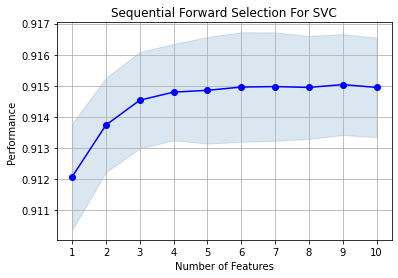

In [61]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig5 = plot_sfs(ffs_svc.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection For SVC')
plt.grid()
plt.show()

In [52]:
download=pd.DataFrame.from_dict(ffs_knn.get_metric_dict()).T
download.to_csv("forward.knn.csv")
pd.DataFrame.from_dict(ffs_knn.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.8742640716991037, 0.9018415876989093, 0.907...",0.898097,"(source_server,)",0.015469,0.012035,0.006018
2,"(2, 6)","[0.9032211521119649, 0.9020359454670379, 0.905...",0.902641,"(source_server, event_page_close)",0.002229,0.001734,0.000867
3,"(2, 6, 7)","[0.9041343202744176, 0.9035192203573362, 0.903...",0.904415,"(source_server, event_page_close, event_problem)",0.001562,0.001216,0.000608
4,"(2, 5, 6, 7)","[0.9054449542941793, 0.9028410323140317, 0.906...",0.905304,"(source_server, event_navigate, event_page_clo...",0.001998,0.001554,0.000777
5,"(2, 5, 6, 7, 8)","[0.9013062409288825, 0.9050048854630333, 0.907...",0.905381,"(source_server, event_navigate, event_page_clo...",0.003094,0.002407,0.001204
6,"(1, 2, 5, 6, 7, 8)","[0.9056958139198902, 0.9045841637977894, 0.907...",0.906088,"(source_browser, source_server, event_navigate...",0.001379,0.001073,0.000536
7,"(1, 2, 5, 6, 7, 8, 9)","[0.9051733487581792, 0.9052349187935034, 0.908...",0.906186,"(source_browser, source_server, event_navigate...",0.001798,0.001399,0.000699
8,"(0, 1, 2, 5, 6, 7, 8, 9)","[0.9051733487581792, 0.9052349187935034, 0.908...",0.906186,"(course_id, source_browser, source_server, eve...",0.001798,0.001399,0.000699
9,"(0, 1, 2, 3, 5, 6, 7, 8, 9)","[0.9038489364780784, 0.9035816670900316, 0.907...",0.905486,"(course_id, source_browser, source_server, eve...",0.002038,0.001586,0.000793
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9052974145724101, 0.9031159420289855, 0.908...",0.905026,"(course_id, source_browser, source_server, eve...",0.002139,0.001664,0.000832


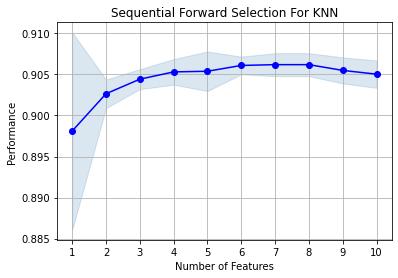

In [53]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig5 = plot_sfs(ffs_knn.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection For KNN')
plt.grid()
plt.show()

In [54]:
download=pd.DataFrame.from_dict(ffs_lr.get_metric_dict()).T
download.to_csv("forward.lr.csv")
pd.DataFrame.from_dict(ffs_lr.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.9102631857097557, 0.912184489910708, 0.9133...",0.911661,"(source_server,)",0.00136,0.001058,0.000529
2,"(2, 4)","[0.9113307447935051, 0.9125829685072729, 0.915...",0.913101,"(source_server, event_discussion)",0.002083,0.001621,0.00081
3,"(2, 4, 6)","[0.9119277065904197, 0.9131923606453207, 0.915...",0.91339,"(source_server, event_discussion, event_page_c...",0.001618,0.001259,0.000629
4,"(2, 4, 6, 9)","[0.9121146852159175, 0.913135593220339, 0.9161...",0.913668,"(source_server, event_discussion, event_page_c...",0.001737,0.001351,0.000676
5,"(2, 3, 4, 6, 9)","[0.9120774312056237, 0.9133535767248075, 0.916...",0.913805,"(source_server, event_access, event_discussion...",0.002133,0.00166,0.00083
6,"(2, 3, 4, 5, 6, 9)","[0.9118976967641657, 0.9132690882134914, 0.917...",0.913829,"(source_server, event_access, event_discussion...",0.002309,0.001796,0.000898
7,"(0, 2, 3, 4, 5, 6, 9)","[0.9118976967641657, 0.9132690882134914, 0.917...",0.913829,"(course_id, source_server, event_access, event...",0.002309,0.001796,0.000898
8,"(0, 2, 3, 4, 5, 6, 7, 9)","[0.91189878785737, 0.9128914939444228, 0.91695...",0.913722,"(course_id, source_server, event_access, event...",0.002231,0.001735,0.000868
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[0.9115963536145856, 0.9127900815937269, 0.916...",0.913446,"(course_id, source_browser, source_server, eve...",0.002394,0.001862,0.000931
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9115963536145856, 0.9127900815937269, 0.916...",0.913439,"(course_id, source_browser, source_server, eve...",0.002398,0.001866,0.000933


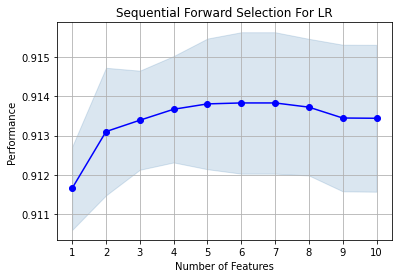

In [55]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig5 = plot_sfs(ffs_lr.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection For LR')
plt.grid()
plt.show()